In [122]:
# import twint
import snscrape.modules.twitter as sntwitter
import os
import datetime
# import nest_asyncio
# nest_asyncio.apply()
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(font_scale=0.3)
# df=pd.read_csv('./twibot-22.csv')
# df['_id']=df['id'].map(lambda x: x[1:])
df=pd.read_csv('./BotAccout.csv')
df['created'] = df['created'].map(lambda x: datetime.datetime.strptime(
    x[:-6], "%Y-%m-%d %H:%M:%S"))



In [123]:
currYear=datetime.datetime.now().year
codes = {'bot': False, 'human': True}
df['isHuman'] = df.label.map(codes)
df['age']=currYear-df['created'].dt.year
df['RetweetCountPer'] = df['totalRetweetCount']/100
df['totalLikeCountPer'] = df['totalLikeCount']/100
df['TweetFrequency'] = df['statusesCount']/(df['age']*365)
df['floFrnRatio'] = df['followersCount']/df['friendsCount']

df['TweetFrequency'] = df['TweetFrequency']*100
df['totalLikeCountPer'] = df['totalLikeCountPer']*100
df['RetweetCountPer'] = df['RetweetCountPer']*100
df['floFrnRatio'] = df['floFrnRatio']*100
df.replace([np.inf, -np.inf], 0, inplace=True)

df['TweetFrequency'] = df['TweetFrequency'].astype(int)
df['floFrnRatio'] = df['floFrnRatio'].astype(int)
df['RetweetCountPer'] = df['RetweetCountPer'].astype(int)
df['floFrnRatio'] = df['floFrnRatio'].astype(int)
# df['floFrnRatio'].isnull().values.any()


def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


/tmp/ipykernel_4361/263389463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Reds', annot=True)


<AxesSubplot: >

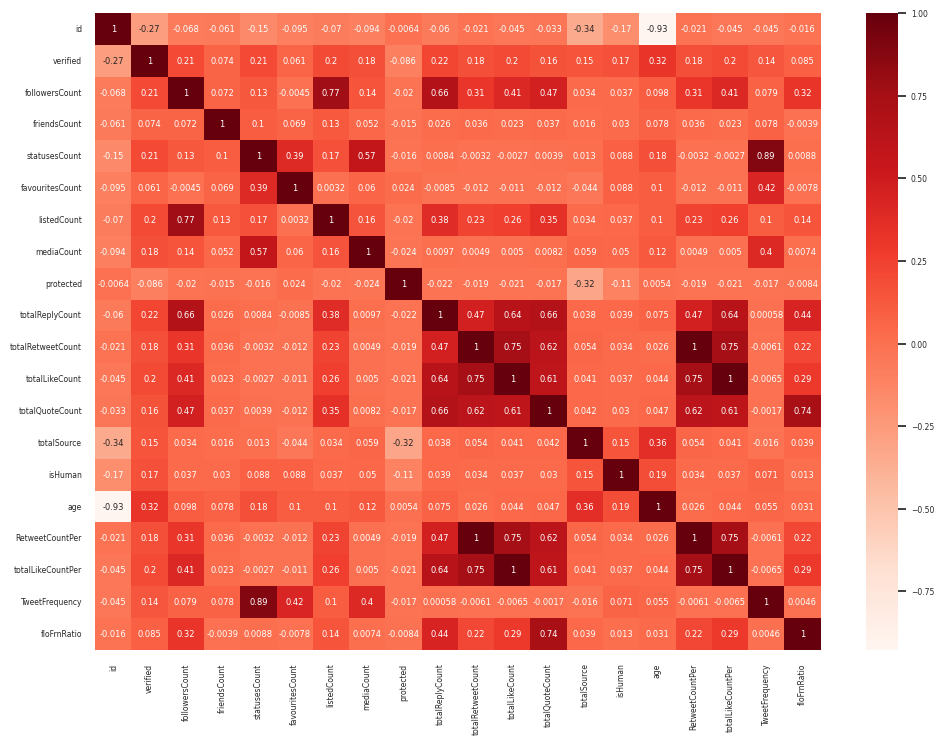

In [80]:
sns.set(font_scale=0.5,rc={'figure.figsize': (11.7, 8.27)})
sns.heatmap(df.corr(), cmap='Reds', annot=True)


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
inputs = df[['verified', 'followersCount', 'friendsCount', 'statusesCount', 'favouritesCount',
            'listedCount', 'mediaCount', 'protected',
             'totalReplyCount', 'totalRetweetCount', 'totalLikeCount',
             'totalQuoteCount', 'totalSource', 'isHuman', 'age', 'RetweetCountPer',
             'totalLikeCountPer', 'TweetFrequency', 'floFrnRatio']]
targets = df['isHuman']
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
    inputs, targets, test_size=0.2)
model = LinearRegression().fit(
    inputs_train, targets_train)

# Generate predictions
predictions = model.predict(inputs_test)
# accuracy_score(train_targets, train_preds)
# Compute loss to evalute the model
loss = rmse(targets_test, predictions)
print('Loss:', loss)


Loss: 1.3378993964410083e-14


In [5]:

justSome=True
j=0
final_df=pd.DataFrame()
for id,label in zip( df['_id'],df['label']):
    user_tweets_list=[]
    
    list1 = []
    id =int(id)
    
    scrapper = sntwitter.TwitterProfileScraper(id)
    # print(scrapper.is_valid_username())
    try:
        user = scrapper.entity
        list1.append([user.username, user.id, label, user.displayname,
                      user.renderedDescription, user.verified, user.created,
                      user.followersCount, user.friendsCount, user.statusesCount,
                      user.favouritesCount, user.listedCount, user.mediaCount, user.location,
                      user.protected, user.link, user.profileImageUrl])

    except:
        print('fail')
        continue

    user_df = pd.DataFrame(list1, columns=['username', 'id', 'label', 'displayname',
                                           'renderedDescription', 'verified', 'created',
                                           'followersCount', 'friendsCount', 'statusesCount',
                                           'favouritesCount', 'listedCount', 'mediaCount', 'location',
                                           'protected', 'link', 'profileImageUrl'])
    current_time = datetime.datetime.now()
    for iteration, tweet in enumerate(sntwitter.TwitterUserScraper(id).get_items()):
        if (justSome == True):
                if (iteration>100):
                    break
            # print(tweet.)
        tweetItem = [tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang,
                        tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount,
                        tweet.quoteCount , tweet.media, tweet.sourceLabel, tweet.quotedTweet, tweet.mentionedUsers]
            
        user_tweets_list.append(tweetItem)
        
    user_tweets_df = pd.DataFrame(user_tweets_list, columns=['DateTime', 'TweetId', 'Text', 'Username', 'Language',
                        'Hashtags','ReplyCount','RetweetCount','LikeCount',
                        'QuoteCount','Media','Source','quotedTweet','mentionedUsers'])
    SourceList = user_tweets_df['Source'].unique().tolist()
    userDict = user_df.to_dict('records')[0]
    hashtagList=[]
    mentionList=[]
    for taglist in user_tweets_df['Hashtags']:
        if (taglist):
            for tag in taglist:
                hashtagList.append(tag)

    for mentions in user_tweets_df['mentionedUsers']:
        if (mentions):
            for mention in mentions:
                mentionList.append(mention.username)

    user_df['totalReplyCount'] = user_tweets_df['ReplyCount'].sum() or 0
    user_df['totalRetweetCount'] = user_tweets_df['RetweetCount'].sum() or 0
    user_df['totalLikeCount'] = user_tweets_df['LikeCount'].sum() or 0
    user_df['totalQuoteCount'] = user_tweets_df['QuoteCount'].sum() or 0
    user_df['totalSource'] = len(
        user_tweets_df['Source'].unique().tolist()) or 0

    user_df.to_csv('BotAccout.csv', mode='a', header=False,index=False)
    

human
1217628182611927040
human
2664730894
human
1266703520205549568
human
1089159225148882949
bot
36741729
bot
1365527332627247104
fail
bot
1679822588
human
1519144464
human
15211869
human
1309034737756000256
bot
1341789703633178624
fail
human
848975226
human
1109809482656149504
human
138814032
human
457554412
human
17899123
bot
2465283662
human
1467973039883182090
human
234059290
human
1142890104853106688
human
779266494270173187
bot
1275028426672549888
fail
human
284870222
human
1280925874267787270
human
2599121383
human
912974971370115072
human
1322906536029626368
human
83389771
human
129211757
human
765845
human
804075344
fail
human
935031277


KeyboardInterrupt: 

In [35]:
user_df
user_tweets_df['Source'].unique()

array(['Twitter for iPhone', 'Instagram', 'Twitter Web App',
       'Salsa Social Publishing', 'Twitter Web Client', 'Product Hunt'],
      dtype=object)

In [32]:
from joblib import Parallel, delayed


def process(i):
    return i * i


# for i in range(10000000):
    # process(i)
results = Parallel(n_jobs=5)(delayed(process)(i) for i in range(10000000))
print(results)  # prints [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


KeyboardInterrupt: 

exception calling callback for <Future at 0x7f580d2d0460 state=finished returned list>
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/lib/python3/dist-packages/joblib/parallel.py", line 366, in __call__
    self.parallel.dispatch_next()
  File "/usr/lib/python3/dist-packages/joblib/parallel.py", line 799, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/lib/python3/dist-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/lib/python3/dist-packages/joblib/parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/lib/python3/dist-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError: 'NoneType' object has no attribute 'submit'
exception calling callback

In [160]:
import snscrape.modules.twitter as sntwitter
list1=[]
# val = val = sntwitter.TwitterUserScraper(779266494270173187)
# df['data']=df['_id'].map(lambda x: sntwitter.TwitterUserScraper(x))
for id in df['id'][:10]:
    id = id[1:]
    # sntwitter.User
    scrapper = sntwitter.TwitterProfileScraper(int(id))
    print(id)
    try:
        user=scrapper.entity
        # declare a username
        # for i, tweet in enumerate(scrapper.get_items()):
        list1.append([user.username, user.id, user.displayname,
              user.renderedDescription, user.verified, user.created, 
              user.followersCount, user.friendsCount, user.statusesCount,
               user.favouritesCount, user.listedCount, user.mediaCount,user.location,
              user.protected, user.link, user.profileImageUrl])
            # break
    #tweets loop

    # twwts df
    # calc
    #uuser_df
       
    except:
        print('fail')

    user_df = pd.DataFrame(list1, columns=['username', 'id', 'displayname',
                                          'renderedDescription', 'verified', 'created',
                                          'followersCount', 'friendsCount', 'statusesCount',
                                          'favouritesCount', 'listedCount', 'mediaCount', 'location',
                                          'protected', 'link', 'profileImageUrl'])


1217628182611927040
2664730894
1266703520205549568
1089159225148882949
36741729
1365527332627247104
fail
1679822588
1519144464
15211869
1309034737756000256


In [48]:
def profileAnalyis(username, justOneYear):
    user_tweets_list=[]
    list1 = []
    scrapper = sntwitter.TwitterProfileScraper(username)
    # print(scrapper.is_valid_username())
    try:
        user = scrapper.entity
        list1.append([user.username, user.id, user.displayname,
                      user.renderedDescription, user.verified, user.created,
                      user.followersCount, user.friendsCount, user.statusesCount,
                      user.favouritesCount, user.listedCount, user.mediaCount, user.location,
                      user.protected, user.link, user.profileImageUrl])

    except:
        print('fail')
        return None

    user_df = pd.DataFrame(list1, columns=['username', 'id', 'displayname',
                                           'renderedDescription', 'verified', 'created',
                                           'followersCount', 'friendsCount', 'statusesCount',
                                           'favouritesCount', 'listedCount', 'mediaCount', 'location',
                                           'protected', 'link', 'profileImageUrl'])
    current_time = datetime.datetime.now()
    for i, tweet in enumerate(sntwitter.TwitterUserScraper(username).get_items()):
            if (justOneYear==True):
                # if ((current_time.year-tweet.date.year)):
                if ((i>999)):
                    # print('year end')
                    break
            # print(tweet.)
            tweetItem = [tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang,
                        tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount,
                        tweet.quoteCount , tweet.media, tweet.sourceLabel, tweet.quotedTweet, tweet.mentionedUsers]
            # print(tweetItem)
            
            user_tweets_list.append(tweetItem)
        
    # print(user_tweets_list[0])
    user_tweets_df = pd.DataFrame(user_tweets_list, columns=['DateTime', 'TweetId', 'Text', 'Username', 'Language',
                        'Hashtags','ReplyCount','RetweetCount','LikeCount',
                        'QuoteCount','Media','Source','quotedTweet','mentionedUsers'])

    # user_tweets_df = user_tweets_df.iloc[:300]

    user_tweets_df['Hour'] = user_tweets_df['DateTime'].dt.hour

    user_tweets_df['Year'] = user_tweets_df['DateTime'].dt.year

    user_tweets_df['Month'] = user_tweets_df['DateTime'].dt.month

    user_tweets_df['MonthName'] = user_tweets_df['DateTime'].dt.month_name()

    user_tweets_df['MonthDay'] = user_tweets_df['DateTime'].dt.day

    user_tweets_df['DayName'] = user_tweets_df['DateTime'].dt.day_name()
    user_tweets_df['InteractionRating'] = (user_tweets_df['LikeCount'])+(
        user_tweets_df['RetweetCount']*2)+(user_tweets_df['ReplyCount']*3)

    user_tweets_df['Week'] = user_tweets_df['DateTime'].dt.day_of_year/7
    user_tweets_df['Week'] = user_tweets_df['Week'].apply(np.ceil)
    user_tweets_df['Week'] = user_tweets_df['Week'].astype(int)

    user_tweets_df['Date'] = [d.date() for d in user_tweets_df['DateTime']]

    user_tweets_df['Time'] = [d.time() for d in user_tweets_df['DateTime']]
    
    lastYearTweets = user_tweets_df[user_tweets_df['Year']
                                    == user_tweets_df['Year'].max()]

    lastMonthTweets = lastYearTweets[lastYearTweets['Month']
                                    == lastYearTweets['Month'].max()]

    week_monthdata = lastMonthTweets[['Week']]
    # print(week_monthdata)

    lastweekTweets = lastMonthTweets[lastMonthTweets['Week']
                                    == lastMonthTweets['Week'].max()]
    mostInteractedLastYear = lastYearTweets[lastYearTweets['InteractionRating']
                                            == lastYearTweets['InteractionRating'].max()]


    mostInteractedLastWeek = lastweekTweets[lastweekTweets['InteractionRating']
                                            == lastweekTweets['InteractionRating'].max()]

    mostInteractedLastMonth = lastMonthTweets[lastMonthTweets['InteractionRating']
                                            == lastMonthTweets['InteractionRating'].max()]

    scrapper = sntwitter.TwitterProfileScraper(username)

    # user_tweets_df['week_since']=user_tweets_df['Year']

    user_tweets_df['DaysSince']=user_tweets_df['Date']-datetime.date(2006,7,15)
    # print(user_tweets_df['DaysSince'])

    user_tweets_df['DaysSince']=user_tweets_df['DaysSince'].map(lambda x: x.days)
    print(user_tweets_df['DaysSince'])

    user_tweets_df['WeeksSince']=(user_tweets_df['DaysSince']/7)
    user_tweets_df['WeeksSince'] = user_tweets_df['WeeksSince'].apply(np.ceil)
    # print(user_tweets_df['WeeksSince'])
    
    fourweeklistcount = []
    unqweeklist=user_tweets_df['WeeksSince'].unique().tolist()

    if(len(unqweeklist)>=4):
        length=4
    else:
        length=len(unqweeklist)

    for i in range(length):        
        # unqweeklist[:4]
        vvr = user_tweets_df[user_tweets_df['WeeksSince']==unqweeklist[i]]
        fourweeklistcount.append(len(vvr))
    print(fourweeklistcount)
    
    
    SourceList = user_tweets_df['Source'].unique().tolist()


    user_df['sources'] = [SourceList]
    userDict = user_df.to_dict('records')[0]
    LastYearDict = mostInteractedLastYear.to_dict('records')[0]
    LastWeekDict = mostInteractedLastWeek.to_dict('records')[0]
    LastMonthDict = mostInteractedLastMonth.to_dict('records')[0]
    userDict['mostInteractedLastMonth'] = LastMonthDict
    userDict['mostInteractedLastWeek'] = LastWeekDict
    userDict['mostInteractedLastYear'] = LastYearDict
    TweetTimeline = user_tweets_df['DateTime'].to_list()
    TweetTimeline
    userDict['TweetTimeline'] = TweetTimeline
    return user_tweets_df


In [49]:
user_tweets_df = profileAnalyis('elonmusk',True)
user_tweets_df
user_tweets_df['DaysSince']=user_tweets_df['Date']-datetime.date(2006,7,15)


0      6020
1      6020
2      6020
3      6020
4      6020
       ... 
995    5984
996    5984
997    5984
998    5984
999    5984
Name: DaysSince, Length: 1000, dtype: int64
[92, 176, 217, 281]


In [40]:
var = user_tweets_df['DaysSince'].iloc[0]
var.days
user_tweets_df['WeeksSince']
unqweeklist=user_tweets_df['WeeksSince'].unique().tolist()
unqweeklist[:4]
vvr = user_tweets_df[user_tweets_df['WeeksSince']==unqweeklist[0]]
len(vvr)

5

In [162]:

user_tweets_list=[]
current_time = datetime.datetime.now()
justOneYear = False
username = 'ctalhaahmad'
for i, tweet in enumerate(sntwitter.TwitterUserScraper(username).get_items()):
        if (justOneYear==True):
            if ((current_time.year-tweet.date.year)):
                print('year end')
                break
        # print(tweet.)
        tweetItem = [tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang,
                     tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount,
                     tweet.quoteCount , tweet.media, tweet.sourceLabel, tweet.quotedTweet, tweet.mentionedUsers]
        # print(tweetItem)
        
        user_tweets_list.append(tweetItem)
    
# print(user_tweets_list[0])
user_tweets_df = pd.DataFrame(user_tweets_list, columns=['DateTime', 'TweetId', 'Text', 'Username', 'Language',
                    'Hashtags','ReplyCount','RetweetCount','LikeCount',
                    'QuoteCount','Media','Source','quotedTweet','mentionedUsers'])



In [69]:
user_tweets_df_copy=user_tweets_df


In [164]:
import math

import numpy as np






In [205]:

lastYearTweets = user_tweets_df[user_tweets_df['Year']
                                == user_tweets_df['Year'].max()]

lastMonthTweets = lastYearTweets[lastYearTweets['Month']
                                 == lastYearTweets['Month'].max()]

lastweekTweets = lastMonthTweets[lastMonthTweets['Week']
                                 == lastMonthTweets['Week'].max()]
mostInteractedLastYear = lastYearTweets[lastYearTweets['InteractionRating']
                                        == lastYearTweets['InteractionRating'].max()]


mostInteractedLastWeek = lastweekTweets[lastweekTweets['InteractionRating']
                                        == lastweekTweets['InteractionRating'].max()]

mostInteractedLastMonth = lastMonthTweets[lastMonthTweets['InteractionRating']
                                          == lastMonthTweets['InteractionRating'].max()]


,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,...,Hour,Year,Month,MonthName,MonthDay,DayName,InteractionRating,Week,Date,Time
2,2023-01-02 23:13:02+00:00,1610051569399070721,I just played a stalemate draw with a +34 adva...,cTalhaAhmad,en,None,1,0,0,0,...,23,2023,1,January,2,Monday,3,1,2023-01-02,23:13:02


In [207]:

mostInteractedLastWeek


,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,...,Hour,Year,Month,MonthName,MonthDay,DayName,InteractionRating,Week,Date,Time
2,2023-01-02 23:13:02+00:00,1610051569399070721,I just played a stalemate draw with a +34 adva...,cTalhaAhmad,en,None,1,0,0,0,...,23,2023,1,January,2,Monday,3,1,2023-01-02,23:13:02


In [208]:

mostInteractedLastMonth


,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,...,Hour,Year,Month,MonthName,MonthDay,DayName,InteractionRating,Week,Date,Time
2,2023-01-02 23:13:02+00:00,1610051569399070721,I just played a stalemate draw with a +34 adva...,cTalhaAhmad,en,None,1,0,0,0,...,23,2023,1,January,2,Monday,3,1,2023-01-02,23:13:02


In [209]:
scrapper = sntwitter.TwitterProfileScraper(username)
print(id)
list1=[]
try:
        user = scrapper.entity
        # declare a username
        # for i, tweet in enumerate(scrapper.get_items()):
        list1.append([user.username, user.id, user.displayname,
                     user.renderedDescription, user.verified, user.created,
                     user.followersCount, user.friendsCount, user.statusesCount,
                     user.favouritesCount, user.listedCount, user.mediaCount, user.location,
                     user.protected, user.link, user.profileImageUrl])
          # break
    # tweets loop

    # twwts df
    # calc
    # uuser_df

except:
        print('fail')

user_df = pd.DataFrame(list1, columns=['username', 'id', 'displayname',
                                          'renderedDescription', 'verified', 'created',
                                          'followersCount', 'friendsCount', 'statusesCount',
                                          'favouritesCount', 'listedCount', 'mediaCount', 'location',
                                          'protected', 'link', 'profileImageUrl'])


1309034737756000256


In [221]:
SourceList=user_tweets_df['Source'].unique().tolist()
user_df['sources'] = [SourceList]
userDict = user_df.to_dict('records')[0]
LastYearDict = mostInteractedLastYear.to_dict('records')[0]
LastWeekDict = mostInteractedLastWeek.to_dict('records')[0]
LastMonthDict = mostInteractedLastMonth.to_dict('records')[0]
userDict['mostInteractedLastMonth'] = LastMonthDict
userDict['mostInteractedLastWeek'] = LastWeekDict
userDict['mostInteractedLastYear'] = LastYearDict
TweetTimeline=user_tweets_df['DateTime'].to_list()
TweetTimeline
userDict['TweetTimeline'] = TweetTimeline
userDict


TypeError: to_bytes() missing required argument 'length' (pos 1)

In [56]:
import datetime
# datetime.datetime.date(2022,12,6)-datetime.datetime.date(2022,12,1)


NameError: name 'user_tweets_df' is not defined